In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def consecutivity(txt_file, lst):
    f = open(txt_file, "r")
    content = f.readlines()
    f.close()
    istep = []
    consecutive_list = []
    y = 0
    for i in range(len(content)):
        x = content[i].split()
        istep.append(x[0])
    del istep[0]
    istep_num = ([float(y) for y in istep])
    for i in range(len(istep_num)):
        x = istep_num[i]
        if x == y+1 or x == 0:
            consecutive_list.append(lst[i])
            y = istep_num[i]
        else:
            pass
    return consecutive_list

In [3]:
def probe(txt_file, n):
    f = open(txt_file, "r")
    content = f.readlines()
    f.close()
    dummy_var = []
    for i in range(len(content)):
        x = content[i].split()
        dummy_var.append(x[n])
    del dummy_var[0]
    dummyvar_num = ([float(a) for a in dummy_var])
    float_list = consecutivity(txt_file, dummyvar_num)
    return float_list

In [4]:
def Time_Average(txt_file, n):
    delta_tn = []
    Fn = []
    integrand = []
    dummy_time = []
    dummy_float = []
    time = probe(txt_file, 1)
    float_list = probe(txt_file, n)
    for i in range(len(time)):
        if time[i] >= 0.01:
            dummy_time.append(time[i])
            dummy_float.append(float_list[i])
        else:
            pass
    for i in range(len(dummy_time)-1):
        d = (dummy_time[i+1] - dummy_time[i])
        delta_tn.append(d)
        F = (dummy_float[i+1] + dummy_float[i])/2
        Fn.append(F)
    for num1, num2 in zip(delta_tn, Fn):
        integrand.append(num1 * num2)
    sum_integrand = sum(integrand)
    float_list_avg = (1/(dummy_time[-1]-dummy_time[0]))*sum_integrand
    return float_list_avg

In [5]:
def Rh_list(Ftop_list, Fbot_list):
    Rh = []
    for i in range(len(Ftop_list)):
        Rh_element = 3*((Ftop_list[i] - (Fbot_list[i])*(0.55**2))/(1+0.55+(0.55**2)))
        Rh.append(Rh_element)
    return Rh

In [6]:
def sd(txt_file, n):
    sample = []
    lst = probe(txt_file, n)
    for i in range(len(lst)):
        sample.append((lst[i]-Time_Average(txt_file, n))**2)
        Sigma = sum(sample)
        return ((Sigma/(len(lst)-1))**1/2)

In [7]:
def Rh_test(txt_file):
    Ftop_avg = Time_Average(txt_file, 2)
    Fbot_avg = Time_Average(txt_file, 3)
    sd_Ftop = sd(txt_file, 2)
    sd_Fbot = sd(txt_file, 3)
    Rh_avg = 3*((Ftop_avg - (Fbot_avg*(0.55**2)))/(1+0.55+(0.55**2)))
    low_sigma_Rh = 3*(((Ftop_avg-sd_Ftop) - (Fbot_avg-sd_Fbot)*(0.55**2))/(1+0.55+(0.55**2)))
    high_sigma_Rh = 3*(((Ftop_avg+sd_Ftop) - (Fbot_avg+sd_Fbot)*(0.55**2))/(1+0.55+(0.55**2)))
    if low_sigma_Rh < Rh_avg < high_sigma_Rh or low_sigma_Rh > Rh_avg > high_sigma_Rh:
        print('True')
    else:
        print('False')

Text(0.5, 1.0, 'Non-dimensional Time Evolution of Non-dimensional Mean Temperature')

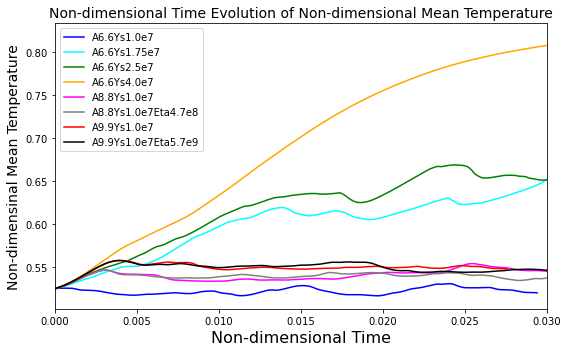

In [8]:
Tmean1 = probe('A6.6Ys1.0e7To0.11_time.txt', 5)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Tmean2 = probe('A6.6Ys1.75e7To0.11_time.txt', 5)
time2 = probe('A6.6Ys1.75e7To0.11_time.txt', 1)
Tmean3 = probe('A6.6Ys2.5e7To0.11_time.txt', 5)
time3 = probe('A6.6Ys2.5e7To0.11_time.txt', 1)
Tmean4 = probe('A6.6Ys4.0e7To0.11_time.txt', 5)
time4 = probe('A6.6Ys4.0e7To0.11_time.txt', 1)
Tmean5 = probe('A8.8Ys1.0e7To0.11_time.txt', 5)
time5 = probe('A8.8Ys1.0e7To0.11_time.txt', 1)
Tmean6 = probe('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 5)
time6 = probe('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 1)
Tmean7 = probe('A9.9Ys1.0e7To0.11_time.txt', 5)
time7 = probe('A9.9Ys1.0e7To0.11_time.txt', 1)
Tmean8 = probe('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 5)
time8 = probe('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 1)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time1, Tmean1, color='blue', label = "A6.6Ys1.0e7")
plt.plot(time2, Tmean2, color='cyan', label = "A6.6Ys1.75e7")
plt.plot(time3, Tmean3, color='green', label = "A6.6Ys2.5e7")
plt.plot(time4, Tmean4, color='orange', label = "A6.6Ys4.0e7")
plt.plot(time5, Tmean5, color='magenta', label = "A8.8Ys1.0e7")
plt.plot(time6, Tmean6, color='grey', label = "A8.8Ys1.0e7Eta4.7e8")
plt.plot(time7, Tmean7, color='red', label = "A9.9Ys1.0e7")
plt.plot(time8, Tmean8, color='black', label = "A9.9Ys1.0e7Eta5.7e9")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Mean Temperature", fontsize=14)
plt.title("Non-dimensional Time Evolution of Non-dimensional Mean Temperature", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of Non-dimensional Mean Temperature")

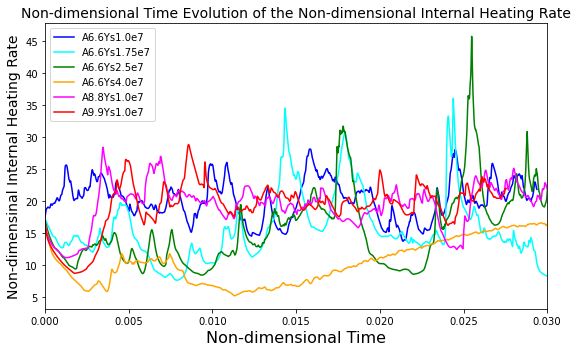

In [9]:
Ftop1 = probe('A6.6Ys1.0e7To0.11_time.txt', 2)
Fbot1 = probe('A6.6Ys1.0e7To0.11_time.txt', 3)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Rh1 = Rh_list(Ftop1, Fbot1)
Ftop2 = probe('A6.6Ys1.75e7To0.11_time.txt', 2)
Fbot2 = probe('A6.6Ys1.75e7To0.11_time.txt', 3)
time2 = probe('A6.6Ys1.75e7To0.11_time.txt', 1)
Rh2 = Rh_list(Ftop2, Fbot2)
Ftop3 = probe('A6.6Ys2.5e7To0.11_time.txt', 2)
Fbot3 = probe('A6.6Ys2.5e7To0.11_time.txt', 3)
time3 = probe('A6.6Ys2.5e7To0.11_time.txt', 1)
Rh3 = Rh_list(Ftop3, Fbot3)
Ftop4 = probe('A6.6Ys4.0e7To0.11_time.txt', 2)
Fbot4 = probe('A6.6Ys4.0e7To0.11_time.txt', 3)
time4 = probe('A6.6Ys4.0e7To0.11_time.txt', 1)
Rh4 = Rh_list(Ftop4, Fbot4)
Ftop5 = probe('A8.8Ys1.0e7To0.11_time.txt', 2)
Fbot5 = probe('A8.8Ys1.0e7To0.11_time.txt', 3)
time5 = probe('A8.8Ys1.0e7To0.11_time.txt', 1)
Rh5 = Rh_list(Ftop5, Fbot5)
Ftop7 = probe('A9.9Ys1.0e7To0.11_time.txt', 2)
Fbot7 = probe('A9.9Ys1.0e7To0.11_time.txt', 3)
time7 = probe('A9.9Ys1.0e7To0.11_time.txt', 1)
Rh7 = Rh_list(Ftop7, Fbot7)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time1, Rh1, color='blue', label = "A6.6Ys1.0e7")
plt.plot(time2, Rh2, color='cyan', label = "A6.6Ys1.75e7")
plt.plot(time3, Rh3, color='green', label = "A6.6Ys2.5e7")
plt.plot(time4, Rh4, color='orange', label = "A6.6Ys4.0e7")
plt.plot(time5, Rh5, color='magenta', label = "A8.8Ys1.0e7")
plt.plot(time7, Rh7, color='red', label = "A9.9Ys1.0e7")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Internal Heating Rate", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate")

In [10]:
Tmean_avg1 = Time_Average('A6.6Ys1.0e7To0.11_time.txt', 5)
Ftop_avg1 = Time_Average('A6.6Ys1.0e7To0.11_time.txt', 2)
Fbot_avg1 = Time_Average('A6.6Ys1.0e7To0.11_time.txt', 3)
Rh_avg1 = 3*((Ftop_avg1 - (Fbot_avg1*(0.55**2)))/(1+0.55+(0.55**2)))
print('Calculated internal heating rate:', Rh_avg1)
print('Time average of non-dimensional mean temperature:',Tmean_avg1)
print('Time average of non-dimensional heat flux at the surface:',Ftop_avg1)
print('Time average of non-dimensional heat flux at the CMB:',Fbot_avg1)

Calculated internal heating rate: 20.122441667250808
Time average of non-dimensional mean temperature: 0.5230832960644043
Time average of non-dimensional heat flux at the surface: 17.660363973251545
Time average of non-dimensional heat flux at the CMB: 17.304979318096425


In [11]:
sd_T1 = sd('A6.6Ys1.0e7To0.11_time.txt', 5)
sd_Ftop1 = sd('A6.6Ys1.0e7To0.11_time.txt', 2)
sd_Fbot1 = sd('A6.6Ys1.0e7To0.11_time.txt', 3)
print('Standard deviation of non-dimensional mean temperature:',sd_T1)
print('Standard deviation of non-dimensional heat flux at the surface:',sd_Ftop1)
print('Standard deviation of non-dimensional heat flux at the CMB:',sd_Fbot1)

Standard deviation of non-dimensional mean temperature: 4.048608002594998e-11
Standard deviation of non-dimensional heat flux at the surface: 2.432801079732351e-05
Standard deviation of non-dimensional heat flux at the CMB: 3.220729251092812e-08


In [14]:
Rh_test('A6.6Ys1.0e7To0.11_time.txt')
Rh_test('A6.6Ys1.75e7To0.11_time.txt')
Rh_test('A6.6Ys2.5e7To0.11_time.txt')
Rh_test('A6.6Ys4.0e7To0.11_time.txt')
Rh_test('A8.8Ys1.0e7To0.11_time.txt')
Rh_test('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt')
Rh_test('A9.9Ys1.0e7To0.11_time.txt')
Rh_test('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt')

True
True
True
True
True
True
True
True


## Effect of Acitvation Energy

Text(0.5, 1.0, 'Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux')

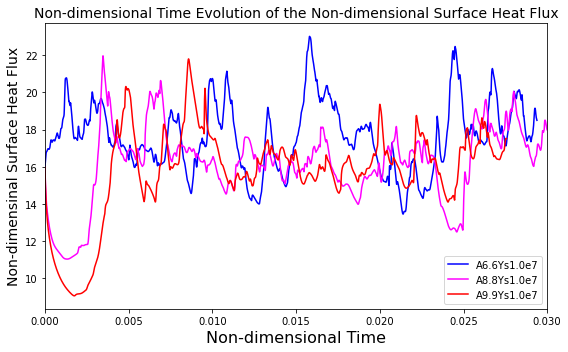

In [13]:
Ftop1 = probe('A6.6Ys1.0e7To0.11_time.txt', 2)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Ftop5 = probe('A8.8Ys1.0e7To0.11_time.txt', 2)
time5 = probe('A8.8Ys1.0e7To0.11_time.txt', 1)
Ftop7 = probe('A9.9Ys1.0e7To0.11_time.txt', 2)
time7 = probe('A9.9Ys1.0e7To0.11_time.txt', 1)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time1, Ftop1, color='blue', label = "A6.6Ys1.0e7")
plt.plot(time5, Ftop5, color='magenta', label = "A8.8Ys1.0e7")
plt.plot(time7, Ftop7, color='red', label = "A9.9Ys1.0e7")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Surface Heat Flux", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux (activation energy)")

Text(0.5, 1.0, 'Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux')

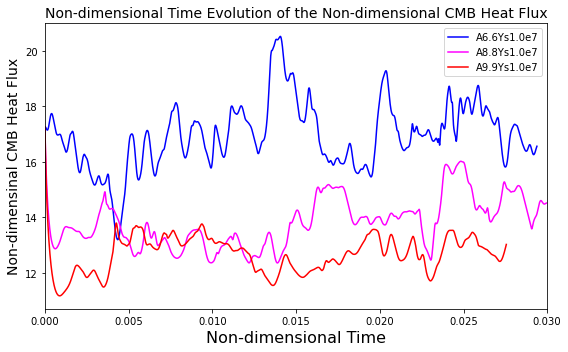

In [14]:
Fbot1 = probe('A6.6Ys1.0e7To0.11_time.txt', 3)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Fbot5 = probe('A8.8Ys1.0e7To0.11_time.txt', 3)
time5 = probe('A8.8Ys1.0e7To0.11_time.txt', 1)
Fbot7 = probe('A9.9Ys1.0e7To0.11_time.txt', 3)
time7 = probe('A9.9Ys1.0e7To0.11_time.txt', 1)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time1, Fbot1, color='blue', label = "A6.6Ys1.0e7")
plt.plot(time5, Fbot5, color='magenta', label = "A8.8Ys1.0e7")
plt.plot(time7, Fbot7, color='red', label = "A9.9Ys1.0e7")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal CMB Heat Flux", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux (activation energy)")

Text(0.5, 1.0, 'Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate')

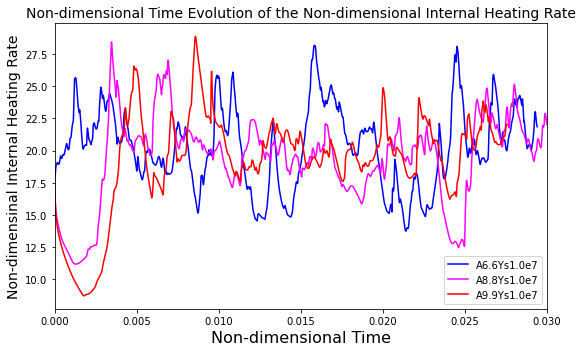

In [15]:
Ftop1 = probe('A6.6Ys1.0e7To0.11_time.txt', 2)
Fbot1 = probe('A6.6Ys1.0e7To0.11_time.txt', 3)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Rh1 = Rh_list(Ftop1, Fbot1)
Ftop5 = probe('A8.8Ys1.0e7To0.11_time.txt', 2)
Fbot5 = probe('A8.8Ys1.0e7To0.11_time.txt', 3)
time5 = probe('A8.8Ys1.0e7To0.11_time.txt', 1)
Rh5 = Rh_list(Ftop5, Fbot5)
Ftop7 = probe('A9.9Ys1.0e7To0.11_time.txt', 2)
Fbot7 = probe('A9.9Ys1.0e7To0.11_time.txt', 3)
time7 = probe('A9.9Ys1.0e7To0.11_time.txt', 1)
Rh7 = Rh_list(Ftop7, Fbot7)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time1, Rh1, color='blue', label = "A6.6Ys1.0e7")
plt.plot(time5, Rh5, color='magenta', label = "A8.8Ys1.0e7")
plt.plot(time7, Rh7, color='red', label = "A9.9Ys1.0e7")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Internal Heating Rate", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate (activation energy)")

## Effect of Yield Stress

Text(0.5, 1.0, 'Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux')

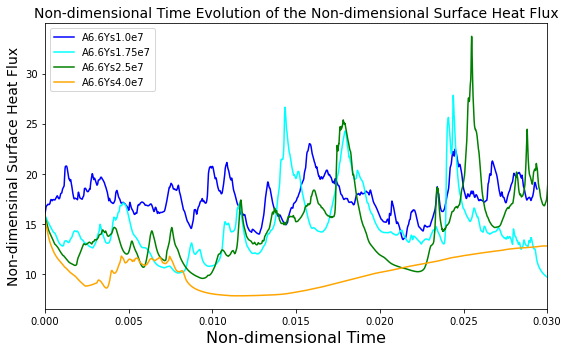

In [16]:
Ftop1 = probe('A6.6Ys1.0e7To0.11_time.txt', 2)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Ftop2 = probe('A6.6Ys1.75e7To0.11_time.txt', 2)
time2 = probe('A6.6Ys1.75e7To0.11_time.txt', 1)
Ftop3 = probe('A6.6Ys2.5e7To0.11_time.txt', 2)
time3 = probe('A6.6Ys2.5e7To0.11_time.txt', 1)
Ftop4 = probe('A6.6Ys4.0e7To0.11_time.txt', 2)
time4 = probe('A6.6Ys4.0e7To0.11_time.txt', 1)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time1, Ftop1, color='blue', label = "A6.6Ys1.0e7")
plt.plot(time2, Ftop2, color='cyan', label = "A6.6Ys1.75e7")
plt.plot(time3, Ftop3, color='green', label = "A6.6Ys2.5e7")
plt.plot(time4, Ftop4, color='orange', label = "A6.6Ys4.0e7")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Surface Heat Flux", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux (yield stress)")

Text(0.5, 1.0, 'Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux')

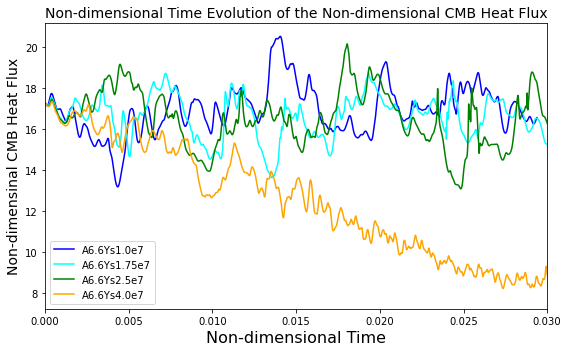

In [17]:
Fbot1 = probe('A6.6Ys1.0e7To0.11_time.txt', 3)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Fbot2 = probe('A6.6Ys1.75e7To0.11_time.txt', 3)
time2 = probe('A6.6Ys1.75e7To0.11_time.txt', 1)
Fbot3 = probe('A6.6Ys2.5e7To0.11_time.txt', 3)
time3 = probe('A6.6Ys2.5e7To0.11_time.txt', 1)
Fbot4 = probe('A6.6Ys4.0e7To0.11_time.txt', 3)
time4 = probe('A6.6Ys4.0e7To0.11_time.txt', 1)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time1, Fbot1, color='blue', label = "A6.6Ys1.0e7")
plt.plot(time2, Fbot2, color='cyan', label = "A6.6Ys1.75e7")
plt.plot(time3, Fbot3, color='green', label = "A6.6Ys2.5e7")
plt.plot(time4, Fbot4, color='orange', label = "A6.6Ys4.0e7")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal CMB Heat Flux", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux (yield stress)")

Text(0.5, 1.0, 'Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate')

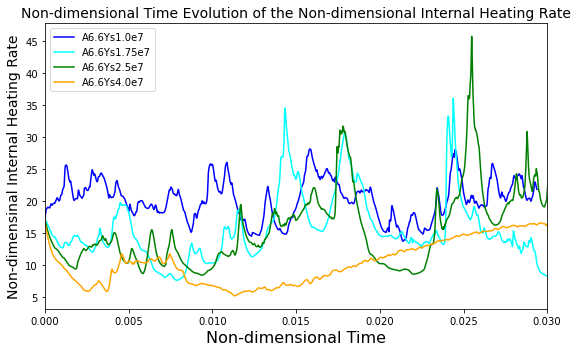

In [18]:
Ftop1 = probe('A6.6Ys1.0e7To0.11_time.txt', 2)
Fbot1 = probe('A6.6Ys1.0e7To0.11_time.txt', 3)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Rh1 = Rh_list(Ftop1, Fbot1)
Ftop2 = probe('A6.6Ys1.75e7To0.11_time.txt', 2)
Fbot2 = probe('A6.6Ys1.75e7To0.11_time.txt', 3)
time2 = probe('A6.6Ys1.75e7To0.11_time.txt', 1)
Rh2 = Rh_list(Ftop2, Fbot2)
Ftop3 = probe('A6.6Ys2.5e7To0.11_time.txt', 2)
Fbot3 = probe('A6.6Ys2.5e7To0.11_time.txt', 3)
time3 = probe('A6.6Ys2.5e7To0.11_time.txt', 1)
Rh3 = Rh_list(Ftop3, Fbot3)
Ftop4 = probe('A6.6Ys4.0e7To0.11_time.txt', 2)
Fbot4 = probe('A6.6Ys4.0e7To0.11_time.txt', 3)
time4 = probe('A6.6Ys4.0e7To0.11_time.txt', 1)
Rh4 = Rh_list(Ftop4, Fbot4)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time1, Rh1, color='blue', label = "A6.6Ys1.0e7")
plt.plot(time2, Rh2, color='cyan', label = "A6.6Ys1.75e7")
plt.plot(time3, Rh3, color='green', label = "A6.6Ys2.5e7")
plt.plot(time4, Rh4, color='orange', label = "A6.6Ys4.0e7")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Internal Heating Rate", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate (yield stress)")

## Effect of Cutoff Temperature

Text(0.5, 1.0, 'Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux')

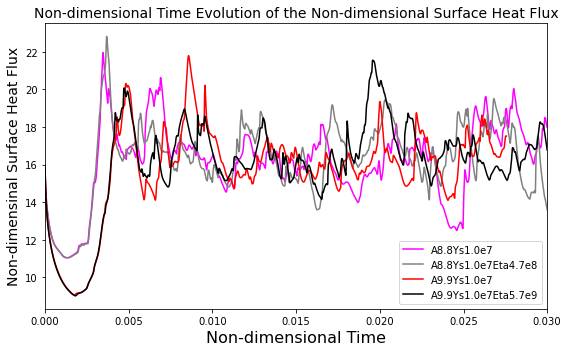

In [19]:
Ftop5 = probe('A8.8Ys1.0e7To0.11_time.txt', 2)
time5 = probe('A8.8Ys1.0e7To0.11_time.txt', 1)
Ftop6 = probe('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 2)
time6 = probe('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 1)
Ftop7 = probe('A9.9Ys1.0e7To0.11_time.txt', 2)
time7 = probe('A9.9Ys1.0e7To0.11_time.txt', 1)
Ftop8 = probe('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 2)
time8 = probe('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 1)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time5, Ftop5, color='magenta', label = "A8.8Ys1.0e7")
plt.plot(time6, Ftop6, color='grey', label = "A8.8Ys1.0e7Eta4.7e8")
plt.plot(time7, Ftop7, color='red', label = "A9.9Ys1.0e7")
plt.plot(time8, Ftop8, color='black', label = "A9.9Ys1.0e7Eta5.7e9")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Surface Heat Flux", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux (T cutoff)")

Text(0.5, 1.0, 'Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux')

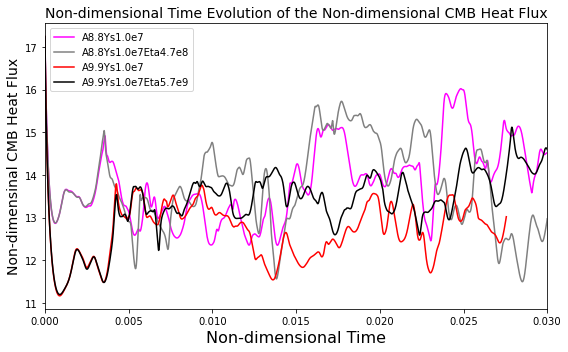

In [20]:
Fbot5 = probe('A8.8Ys1.0e7To0.11_time.txt', 3)
time5 = probe('A8.8Ys1.0e7To0.11_time.txt', 1)
Fbot6 = probe('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 3)
time6 = probe('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 1)
Fbot7 = probe('A9.9Ys1.0e7To0.11_time.txt', 3)
time7 = probe('A9.9Ys1.0e7To0.11_time.txt', 1)
Fbot8 = probe('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 3)
time8 = probe('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 1)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time5, Fbot5, color='magenta', label = "A8.8Ys1.0e7")
plt.plot(time6, Fbot6, color='grey', label = "A8.8Ys1.0e7Eta4.7e8")
plt.plot(time7, Fbot7, color='red', label = "A9.9Ys1.0e7")
plt.plot(time8, Fbot8, color='black', label = "A9.9Ys1.0e7Eta5.7e9")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal CMB Heat Flux", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux (T cutoff)")

Text(0.5, 1.0, 'Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate')

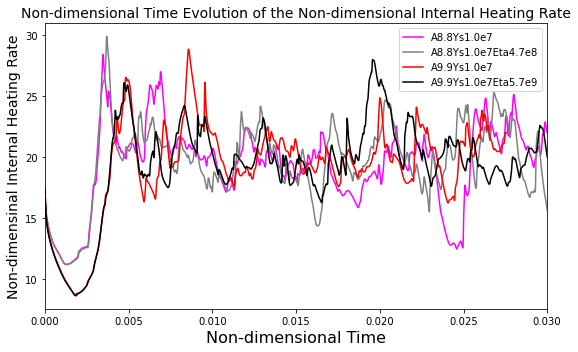

In [21]:
Ftop5 = probe('A8.8Ys1.0e7To0.11_time.txt', 2)
Fbot5 = probe('A8.8Ys1.0e7To0.11_time.txt', 3)
time5 = probe('A8.8Ys1.0e7To0.11_time.txt', 1)
Rh5 = Rh_list(Ftop5, Fbot5)
Ftop6 = probe('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 2)
Fbot6 = probe('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 3)
time6 = probe('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 1)
Rh6 = Rh_list(Ftop6, Fbot6)
Ftop7 = probe('A9.9Ys1.0e7To0.11_time.txt', 2)
Fbot7 = probe('A9.9Ys1.0e7To0.11_time.txt', 3)
time7 = probe('A9.9Ys1.0e7To0.11_time.txt', 1)
Rh7 = Rh_list(Ftop7, Fbot7)
Ftop8 = probe('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 2)
Fbot8 = probe('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 3)
time8 = probe('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 1)
Rh8 = Rh_list(Ftop8, Fbot8)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time5, Rh5, color='magenta', label = "A8.8Ys1.0e7")
plt.plot(time6, Rh6, color='grey', label = "A8.8Ys1.0e7Eta4.7e8")
plt.plot(time7, Rh7, color='red', label = "A9.9Ys1.0e7")
plt.plot(time8, Rh8, color='black', label = "A9.9Ys1.0e7Eta5.7e9")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Internal Heating Rate", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional Internal Heating Rate (T cutoff)")

## Presentation

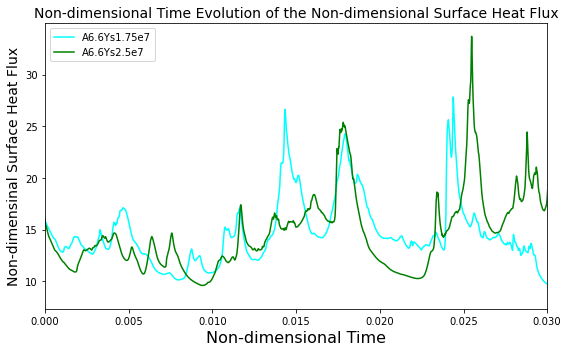

In [23]:
Ftop1 = probe('A6.6Ys1.0e7To0.11_time.txt', 2)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Ftop2 = probe('A6.6Ys1.75e7To0.11_time.txt', 2)
time2 = probe('A6.6Ys1.75e7To0.11_time.txt', 1)
Ftop3 = probe('A6.6Ys2.5e7To0.11_time.txt', 2)
time3 = probe('A6.6Ys2.5e7To0.11_time.txt', 1)
Ftop4 = probe('A6.6Ys4.0e7To0.11_time.txt', 2)
time4 = probe('A6.6Ys4.0e7To0.11_time.txt', 1)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time2, Ftop2, color='cyan', label = "A6.6Ys1.75e7")
plt.plot(time3, Ftop3, color='green', label = "A6.6Ys2.5e7")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Surface Heat Flux", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional Surface Heat Flux (episodic regime)")

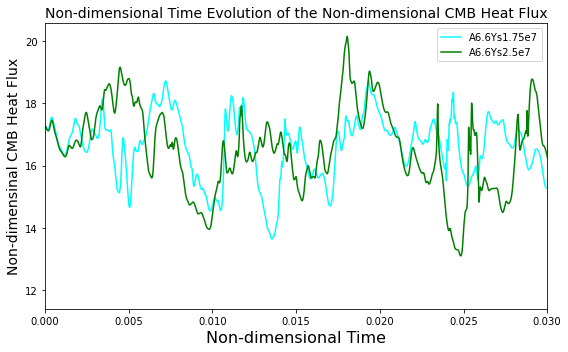

In [24]:
Fbot1 = probe('A6.6Ys1.0e7To0.11_time.txt', 3)
time1 = probe('A6.6Ys1.0e7To0.11_time.txt', 1)
Fbot2 = probe('A6.6Ys1.75e7To0.11_time.txt', 3)
time2 = probe('A6.6Ys1.75e7To0.11_time.txt', 1)
Fbot3 = probe('A6.6Ys2.5e7To0.11_time.txt', 3)
time3 = probe('A6.6Ys2.5e7To0.11_time.txt', 1)
Fbot4 = probe('A6.6Ys4.0e7To0.11_time.txt', 3)
time4 = probe('A6.6Ys4.0e7To0.11_time.txt', 1)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time2, Fbot2, color='cyan', label = "A6.6Ys1.75e7")
plt.plot(time3, Fbot3, color='green', label = "A6.6Ys2.5e7")
plt.legend()
plt.xlim(xmin=0 ,xmax=0.03)
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal CMB Heat Flux", fontsize=14)
plt.title("Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux", fontsize=14)
#plt.savefig("Non-dimensional Time Evolution of the Non-dimensional CMB Heat Flux (episodic regime)")

In [12]:
Ftop1_avg = Time_Average('A6.6Ys1.0e7To0.11_time.txt', 2)
Fbot1_avg = Time_Average('A6.6Ys1.0e7To0.11_time.txt', 3)
Rh1_avg = 3*((Ftop1_avg - (Fbot1_avg)*(0.55**2))/(1+0.55+(0.55**2)))
Ftop2_avg = Time_Average('A6.6Ys1.75e7To0.11_time.txt', 2)
Fbot2_avg = Time_Average('A6.6Ys1.75e7To0.11_time.txt', 3)
Rh2_avg = 3*((Ftop2_avg - (Fbot2_avg)*(0.55**2))/(1+0.55+(0.55**2)))
Ftop3_avg = Time_Average('A6.6Ys2.5e7To0.11_time.txt', 2)
Fbot3_avg = Time_Average('A6.6Ys2.5e7To0.11_time.txt', 3)
Rh3_avg = 3*((Ftop3_avg - (Fbot3_avg)*(0.55**2))/(1+0.55+(0.55**2)))
Ftop4_avg = Time_Average('A6.6Ys4.0e7To0.11_time.txt', 2)
Fbot4_avg = Time_Average('A6.6Ys4.0e7To0.11_time.txt', 3)
Rh4_avg = 3*((Ftop4_avg - (Fbot4_avg)*(0.55**2))/(1+0.55+(0.55**2)))
Ftop5_avg = Time_Average('A8.8Ys1.0e7To0.11_time.txt', 2)
Fbot5_avg = Time_Average('A8.8Ys1.0e7To0.11_time.txt', 3)
Rh5_avg = 3*((Ftop5_avg - (Fbot5_avg)*(0.55**2))/(1+0.55+(0.55**2)))
Ftop6_avg = Time_Average('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 2)
Fbot6_avg = Time_Average('A8.8Ys1.0e7Eta4.7e8To0.11_time.txt', 3)
Rh6_avg = 3*((Ftop6_avg - (Fbot6_avg)*(0.55**2))/(1+0.55+(0.55**2)))
Ftop7_avg = Time_Average('A9.9Ys1.0e7To0.11_time.txt', 2)
Fbot7_avg = Time_Average('A9.9Ys1.0e7To0.11_time.txt', 3)
Rh7_avg = 3*((Ftop7_avg - (Fbot7_avg)*(0.55**2))/(1+0.55+(0.55**2)))
Ftop8_avg = Time_Average('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 2)
Fbot8_avg = Time_Average('A9.9Ys1.0e7Eta5.7e9To0.11_time.txt', 3)
Rh8_avg = 3*((Ftop8_avg - (Fbot8_avg)*(0.55**2))/(1+0.55+(0.55**2)))
print(Rh1_avg, Rh2_avg, Rh3_avg, Rh4_avg, Rh5_avg, Rh6_avg, Rh7_avg, Rh8_avg)

20.122441667250808 15.633553323260086 17.666438862692942 12.112243307609711 19.75459295371887 19.795830783652242 20.058990096997146 20.17334224977948
